Priciple Component Analysis : is one of the easiest, most intuitive and most frequently used methods for dimensionality reduction, projecting the data into its feature space

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

C:\Users\conne\AppData\Local\Temp/ipykernel_3268/1442889866.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
C:\Users\conne\AppData\Local\Temp/ipykernel_3268/1442889866.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_clr = np.choose(y,[1,2,0]).astype(np.float)


[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

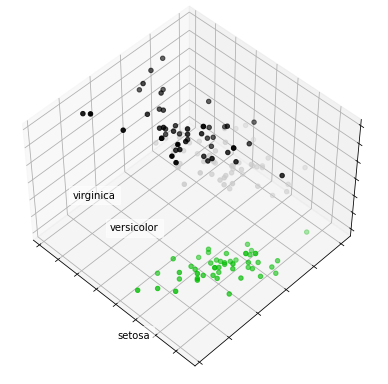

In [9]:
fig = plt.figure(1,figsize=(6,5))
plt.clf()
ax = Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
plt.cla()
for name , label in [('setosa',0), ('versicolor',1), ('virginica',2)]:
    ax.text3D(X[y==label , 0].mean(),
              X[y==label , 1].mean()+1.5,
              X[y==label , 2].mean(),name,horizontalalignment='center',bbox=dict(alpha=.5,edgecolor='w',facecolor='w'))
y_clr = np.choose(y,[1,2,0]).astype(np.float)
ax.scatter(X[:,0],X[:,1],X[:,2],c=y_clr,cmap=plt.cm.nipy_spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
        

Now let's see how PCA will improve the results of a simple model that is not able to correctly fit all the training data

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

clf = DecisionTreeClassifier(max_depth=2,random_state=42)
clf.fit(X_train,y_train)
preds = clf.predict_proba(X_test)
print("Accuracy : {:0.5f}".format(accuracy_score(y_test,preds.argmax(axis=1))))

Accuracy : 0.88889


Let's try to reduce to dimensionality to 2 dimension

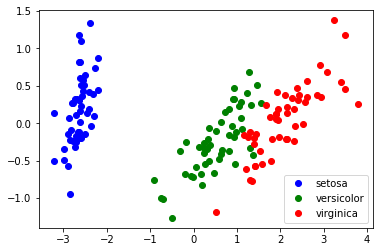

In [14]:
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
# Plotting of the result of PCA

plt.plot(X_pca[y==0,0],X_pca[y==0,1],'bo',label='setosa')
plt.plot(X_pca[y==1,0],X_pca[y==1,1],'go',label='versicolor')
plt.plot(X_pca[y==2,0],X_pca[y==2,1],'ro',label='virginica')
plt.legend(loc=0)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.3,random_state=42,stratify=y)

clf = DecisionTreeClassifier(max_depth=2,random_state=42)
clf.fit(X_train,y_train)
preds = clf.predict_proba(X_test)
print("Accuracy : {:0.5f}".format(accuracy_score(y_test,preds.argmax(axis=1))))

Accuracy : 0.91111


The accuracy did not increase significantly in this case, but with other datasets with a high number of dimension, PCA can drastically improve the accuracy of decision tree and other ensemble methods

Now, Let's check out the precent of variance that can be explained by each of the component

In [21]:
for i , component in enumerate(pca.components_):
    print("{} component : {}% of initial variance".format(i+1,round(100*pca.explained_variance_ratio_[i],2)))
    print(" + ".join("%.3f x %s "% (value,name) for value,name in zip(component,iris.feature_names)))

1 component : 92.46% of initial variance
0.361 x sepal length (cm)  + -0.085 x sepal width (cm)  + 0.857 x petal length (cm)  + 0.358 x petal width (cm) 
2 component : 5.31% of initial variance
0.657 x sepal length (cm)  + 0.730 x sepal width (cm)  + -0.173 x petal length (cm)  + -0.075 x petal width (cm) 
